# Projets -  idées  innovantes d’applications en lien avec l'alimentation

## Résumé 

On veut savoir les aliments les plus addapté pour une personne que envisage d'aquerir de bonnes habitudes alimentaires. On cherche donc à prédire la présence de graisses saturées, omega 3, omega 6, omega 9, du sel et sucre non necessaire, vitamines, fibres, mineraux, proteines et calcium. Cela en evitant les additifs et on previlegient les aliments avec un nutriscore et ecoscore favorable.

## Méthode 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from myfile import remove_outlier,isnull_values_sum,plot_box_plot,read_csv_morceaux,\
                   file_len,read_csv_morceaux_nutriscore,variables_with_nutriscore
import warnings
warnings.simplefilter(action='ignore', category=Warning)    

### Liste de variables necessaires pour le projet

In [2]:
# Liste de variables necessaires pour le projet
List_projet =  ['product_name','categories','nutriscore_grade','nutriscore_score','nova_group','ecoscore_grade_fr','ecoscore_score_fr',
                'countries_en','origins_tags','labels','allergens','additives_en','ingredients_from_palm_oil_n',
                'ingredients_that_may_be_from_palm_oil_n','fat_100g','saturated-fat_100g','energy-kcal_100g','energy-kj_100g',
                'carbon-footprint-from-meat-or-fish_100g','carbohydrates_100g','omega-3-fat_100g','omega-6-fat_100g','omega-9-fat_100g',
                'cholesterol_100g','trans-fat_100g','sugars_100g','proteins_100g','sodium_100g',
                'alcohol_100g','vitamin-a_100g','vitamin-d_100g','vitamin-e_100g',
                'vitamin-k_100g','vitamin-c_100g','vitamin-b1_100g','vitamin-b2_100g','vitamin-pp_100g','calcium_100g',
                'vitamin-b6_100g','vitamin-b9_100g','vitamin-b12_100g','fruits-vegetables-nuts_100g','fruits-vegetables-nuts-dried_100g',
                'fruits-vegetables-nuts-estimate_100g','trans-fat_100g','cholesterol_100g','fiber_100g','-sucrose_100g','-glucose_100g',
                '-fructose_100g','-lactose_100g','-maltose_100g','-maltodextrins_100g','starch_100g','polyols_100g','serum-proteins_100g',
                'soluble-fiber_100g','-insoluble-fiber_100g','casein_100g']

In [3]:
pd.set_option("display.precision", 2)          
pd.set_option("display.max.columns", None)    
pd.set_option("display.max.rows", None)

dir_data = Path('../../DATA/P3/') 
dir_fig  = Path('../../FIGURES/P3/')
file1    = Path(str(dir_data) + "/en.openfoodfacts.org.products.csv")
dir_data_abs= Path(file1).parent.absolute()

marche_FR = 0
if marche_FR == 1:
    region = 'FR_'
    header = "/head_FR.xlsx"
    file2 = Path(str(dir_data) + "/FR.openfoodfacts.org.products.csv")
    file3 = Path(str(dir_data) + "/Projet.openfoodfacts.org.products.csv")
else:
    region = 'GLOBAL_'
    header = "/head_GLOBAL.xlsx"
    file2 = Path(str(dir_data) + "/NScore.openfoodfacts.org.products.csv")
    file3 = Path(str(dir_data) + "/Projet_NScore.openfoodfacts.org.products.csv")   

### Telechargement des données

In [4]:
if marche_FR == 1:
    if file2.exists ():
        new_df =pd.read_csv(file2,  sep='\t', encoding='utf-8', low_memory=False)
        print ("Fichier existe")
    else:
        maxrow0=0
        len_file1=file_len(file1)
        deltaline =500000
        for maxrow in range(0,len_file1,deltaline):
            print(maxrow+deltaline,'sur',len_file1) 
            read_csv_morceaux(file1,maxrow,deltaline,'countries_en',r'France','France',str(dir_data_abs),region)
            
        df = []
        for maxrow in range(0,len_file1,deltaline):
            file_new = Path(str(dir_data_abs) +'/' + str(region) + str(maxrow+deltaline)+".csv", low_memory=False)
            df_in =pd.read_csv(file_new,  sep='\t', encoding='utf-8')
            df.append(df_in)
        
        new_df = pd.concat(df)
        # Creer un fichier .csv avec les donnees du marché Français
        new_df.to_csv (file2,  sep='\t', encoding='utf-8') 
        print ("Rassembler les fichiers pour le marché Français")
        new_df.head().T.to_excel(Path(str(dir_data) + str(header)))
        

Plus de la moitier des produits vendu sur le marche Francais et repertorié dans cette serie de donnees n'ont pas des informations sur le nutriscore. Donc, je change un peu de strategie et je analyse egalement les donnees du marchee mundial que ont les informations sur le nutriscore.


In [5]:
if marche_FR == 0:
    if file2.exists ():
        new_df =pd.read_csv(file2,  sep='\t', encoding='utf-8', low_memory=False)
        print ("Fichier existe")
    else:
        maxrow0=0
        len_file1=file_len(file1)
        deltaline =500000
        for maxrow in range(0,len_file1,deltaline):
            print(maxrow+deltaline,'sur',len_file1) 
            read_csv_morceaux(file1,maxrow,deltaline,'nutriscore_grade',str(dir_data_abs),region)
            
        df = []
        for maxrow in range(0,len_file1,deltaline):
            file_new = Path(str(dir_data_abs) +'/' + str(region)  + str(maxrow+deltaline)+".csv", low_memory=False)
            df_in =pd.read_csv(file_new,  sep='\t', encoding='utf-8')
            df.append(df_in)
        
        new_df = pd.concat(df)
        # Creer un fichier .csv avec les donnees du marché mundial
        new_df.to_csv (file2,  sep='\t', encoding='utf-8') 
        print ("Rassembler les fichiers pour le marché Mundial avec nutriscore non nulle")
        new_df.head().T.to_excel(Path(str(dir_data) + str(header)))

Fichier existe


#### Donnees necessaires pour le projet

In [6]:
filtered_df = new_df.loc[:,List_projet]

#### Traiter les doublons

In [7]:
df_dup = new_df.duplicated().sum()
if df_dup>0:
    new_df = new_df.drop_duplicates()
    print('Total doublons:  ',df_dup)

#### Traiter les valeurs aberrants

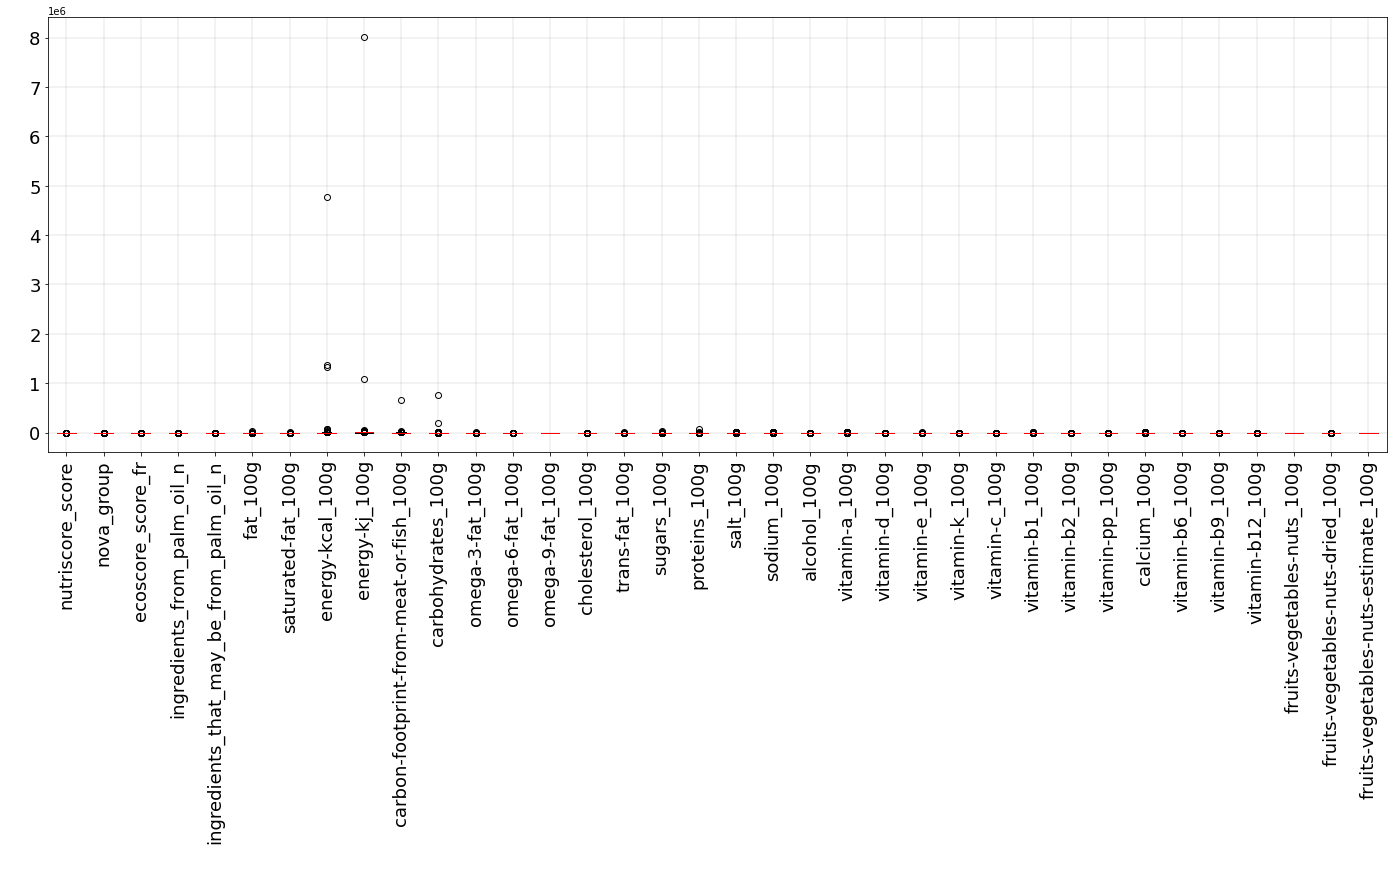

In [8]:
figure_name =Path(str(dir_fig) +'/' + str(region) + str('Before_remove_Outliers.jpeg'))

ylabel = " "
xlabel = " "
ax = plot_box_plot(filtered_df,xlabel,ylabel,figure_name)

In [9]:
q1value=0.25
q3value=0.75
df1 = remove_outlier(filtered_df,q1value,q3value)

/Users/yjose/Desktop/Data_scientist/Data-Science-Course/PSanté_JOSE_Yonss/myfile.py:14: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_out = df_in[~((df_in < fence_low) |(df_in > fence_high)).any(axis=1)]
/Users/yjose/Desktop/Data_scientist/Data-Science-Course/PSanté_JOSE_Yonss/myfile.py:14: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_out = df_in[~((df_in < fence_low) |(df_in > fence_high)).any(axis=1)]


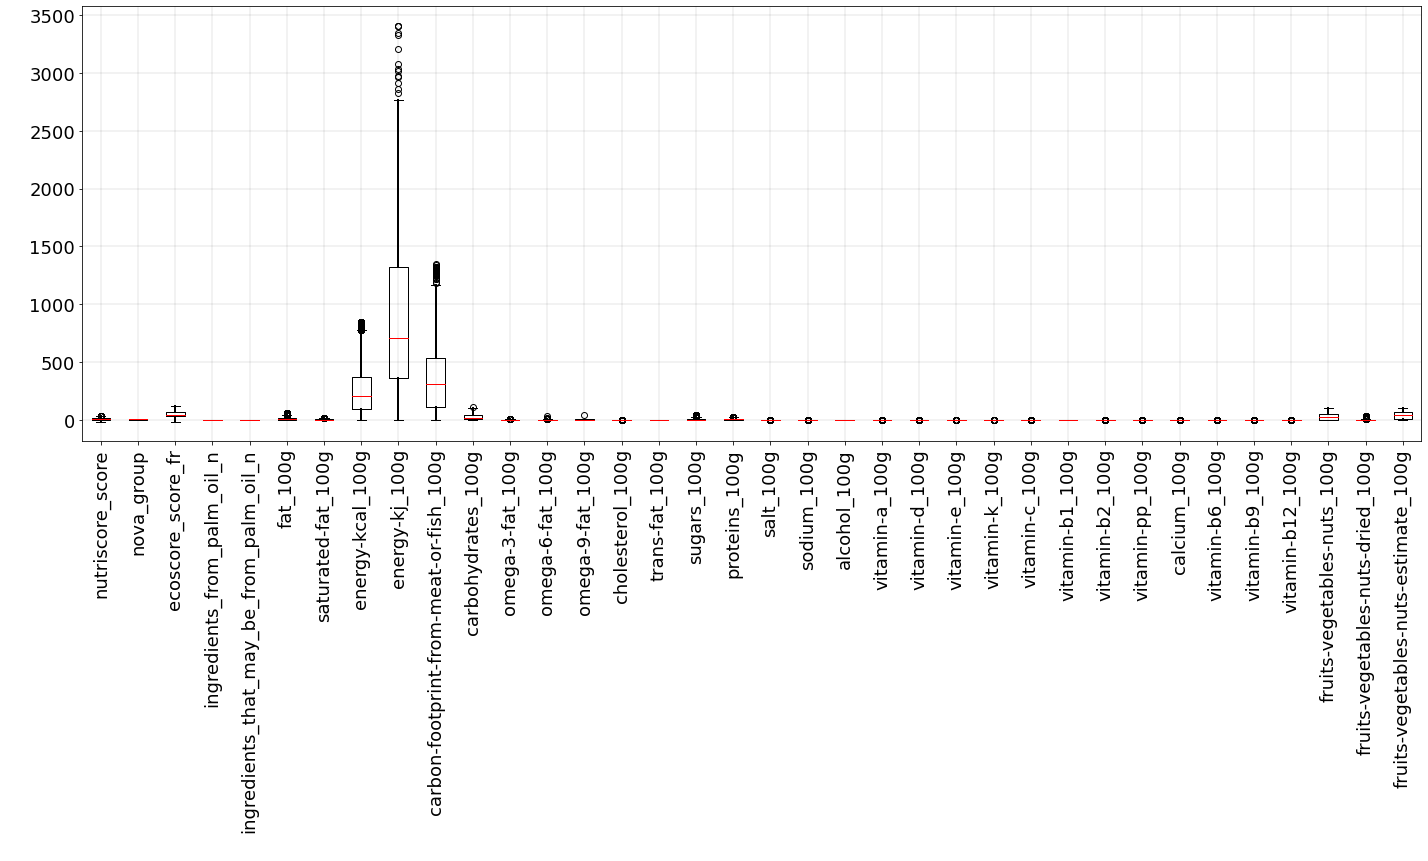

In [10]:
figure_name =Path(str(dir_fig) +'/' + str(region) + str('After_remove_Outliers.jpeg'))

ylabel = " "
xlabel = " "
ax = plot_box_plot(df1,xlabel,ylabel,figure_name)

Energy_cal_100g, energy_kj_100g et carbon-footprint-from-meat-or-fish_100g ont encore des valeurs 
aberrant.

#### Traiter les valeurs manquants

In [11]:
Null = df1.isnull().sum() 
Na = df1.isna().sum()
df_NaN = pd.DataFrame(data=Na)
print(df_NaN)

                                              0
product_name                               1583
categories                                    1
nutriscore_grade                              0
nutriscore_score                              0
nova_group                               162651
ecoscore_grade_fr                        187443
ecoscore_score_fr                        187443
countries_en                                584
origins_tags                             363609
labels                                   264736
allergens                                305364
additives_en                             237834
ingredients_from_palm_oil_n              142695
ingredients_that_may_be_from_palm_oil_n  142695
fat_100g                                    432
saturated-fat_100g                          445
energy-kcal_100g                          24147
energy-kj_100g                           329787
carbon-footprint-from-meat-or-fish_100g  388505
carbohydrates_100g                      

Je fait le choix de, dans un premier temps, supprimer certain variables que sont truffée de données manquantes (plus de 50% de valeurs manquantes pour les données global  et en function de nutriscore dans les données Francais). J'ai egalement choisi de ne pas imputer les valeurs manquantes cars pour le projet, cela peut engendrer des erreurs sur la proposition des produits sains.


In [12]:
if marche_FR == 1:
    a = df_NaN.loc['nutriscore_grade']
    nutriscore_values = a[0]+1
    df_final = variables_with_nutriscore(df1,nutriscore_values)
else:
    define_max_acepteble_nan= 2        # 2 c'est la moitier de NaN or Nul
    df_final = isnull_values_sum(df1,define_max_acepteble_nan)
    
print(df1.shape)
print(df_final.shape)

197883.0
(395766, 45)
(395766, 18)


In [13]:
# Creer un fichier .csv avec les donnees du marché Francais
df_final.to_csv (file3, sep='\t', encoding='utf-8')#, index = False, header=True)
print ("Creater le fichier pour le projet ")

Creater le fichier pour le projet 


In [14]:
df_final.head()

,product_name,categories,nutriscore_grade,nutriscore_score,nova_group,ecoscore_grade_fr,ecoscore_score_fr,countries_en,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,fat_100g,saturated-fat_100g,energy-kcal_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
1,Salade de carottes râpées,"Plats préparés, Légumes préparés, Carottes râp...",b,1.0,NaN,b,83.0,France,NaN,NaN,0.3,0.1,32.0,5.3,3.9,0.9,0.42,0.17
2,Tarte noix de coco,"Tartes, Tartes sucrées, Tartes à la noix de coco",d,14.0,NaN,NaN,NaN,France,NaN,NaN,22.0,15.5,381.0,27.3,21.9,4.6,0.10,0.04
3,Compote de poire,"Aliments et boissons à base de végétaux, Alime...",a,-2.0,NaN,b,81.0,France,NaN,NaN,0.0,0.0,157.0,36.0,27.0,0.6,0.00,0.00
4,Salade de macedoine de légumes,"Plats préparés, Légumes préparés, Entrées, Ent...",b,1.0,NaN,b,74.0,France,NaN,NaN,12.7,1.0,143.0,3.9,1.0,1.9,0.27,0.11
6,cuisse de poulet direct au four curry,"Viandes, Volailles, Poulets, Cuisses de poulet",c,4.0,NaN,d,29.0,France,NaN,NaN,13.0,4.0,197.0,3.0,0.9,17.0,1.10,0.44
